# Project: Investigate a Dataset - [Cars dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Cars dataset 

>This dataset contains information about cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

>The columns given in the given dataset are as follows:
'make', 'model', 'type', 'origin', 'drivetrain', 'msrp', 'invoice',
'enginesize', 'cylinders', 'horsepower', 'mpg_city', 'mpg_highway',
'weight', 'wheelbase', 'length'.


### Questions for Analysis:

>What is the most frequent brands?

>Where is the origin with highest number of cars?

>What is the brand with most expensive cars?

>Which region shares the highest average Price?

>Is there a correlation between engine size and price?

>Is there a correlation between horse power and price?

>What is the most expensive car type?

>What is the most fuel efficient brand for travelling?

>What is the most fuel efficient brand for the city?

>Are cars more fuel efficient on high way or  in the city?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
df = pd.read_csv('Cars _Dataset.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP $,Invoice $,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSXTypeS2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5RL4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [3]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP $', 'Invoice $',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP $       428 non-null    int64  
 6   Invoice $    428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


In [5]:
df.describe()

,MSRP $,Invoice $,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>Checked for duplicates.

>Checked for null values


In [6]:
df.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace=True)

In [7]:
df.head(1)

,make,model,type,origin,drivetrain,msrp_$,invoice_$,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189


In [8]:
df.isnull().sum()

make           0
model          0
type           0
origin         0
drivetrain     0
msrp_$         0
invoice_$      0
enginesize     0
cylinders      2
horsepower     0
mpg_city       0
mpg_highway    0
weight         0
wheelbase      0
length         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

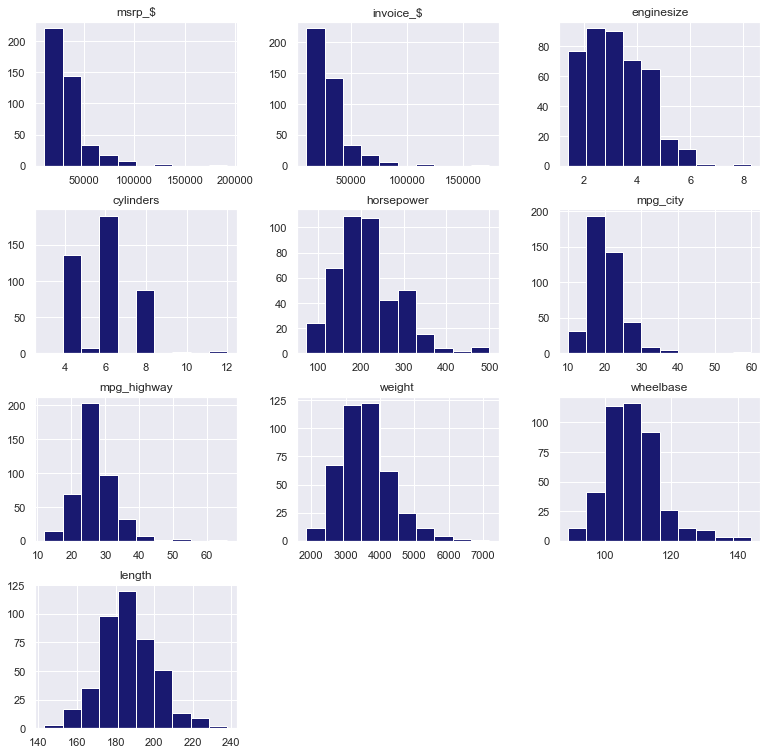

In [11]:
df.hist(figsize=(13,13),
        color = 'midnightblue');

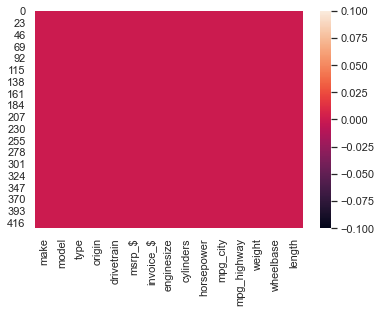

In [12]:
sns.heatmap(df.isnull());

# Q1: What is the most frequent brands?

In [13]:
brand = df['make'].value_counts()
brand

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Mitsubishi       13
Dodge            13
Hyundai          12
Volvo            12
Jaguar           12
Kia              11
Subaru           11
Lexus            11
Pontiac          11
Mercury           9
Buick             9
Mazda             9
Lincoln           9
Suzuki            8
Cadillac          8
Saturn            8
GMC               8
Infiniti          8
Acura             7
Porsche           7
Saab              7
LandRover         3
Jeep              3
Oldsmobile        3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: make, dtype: int64

In [14]:
df['make'].nunique()

38

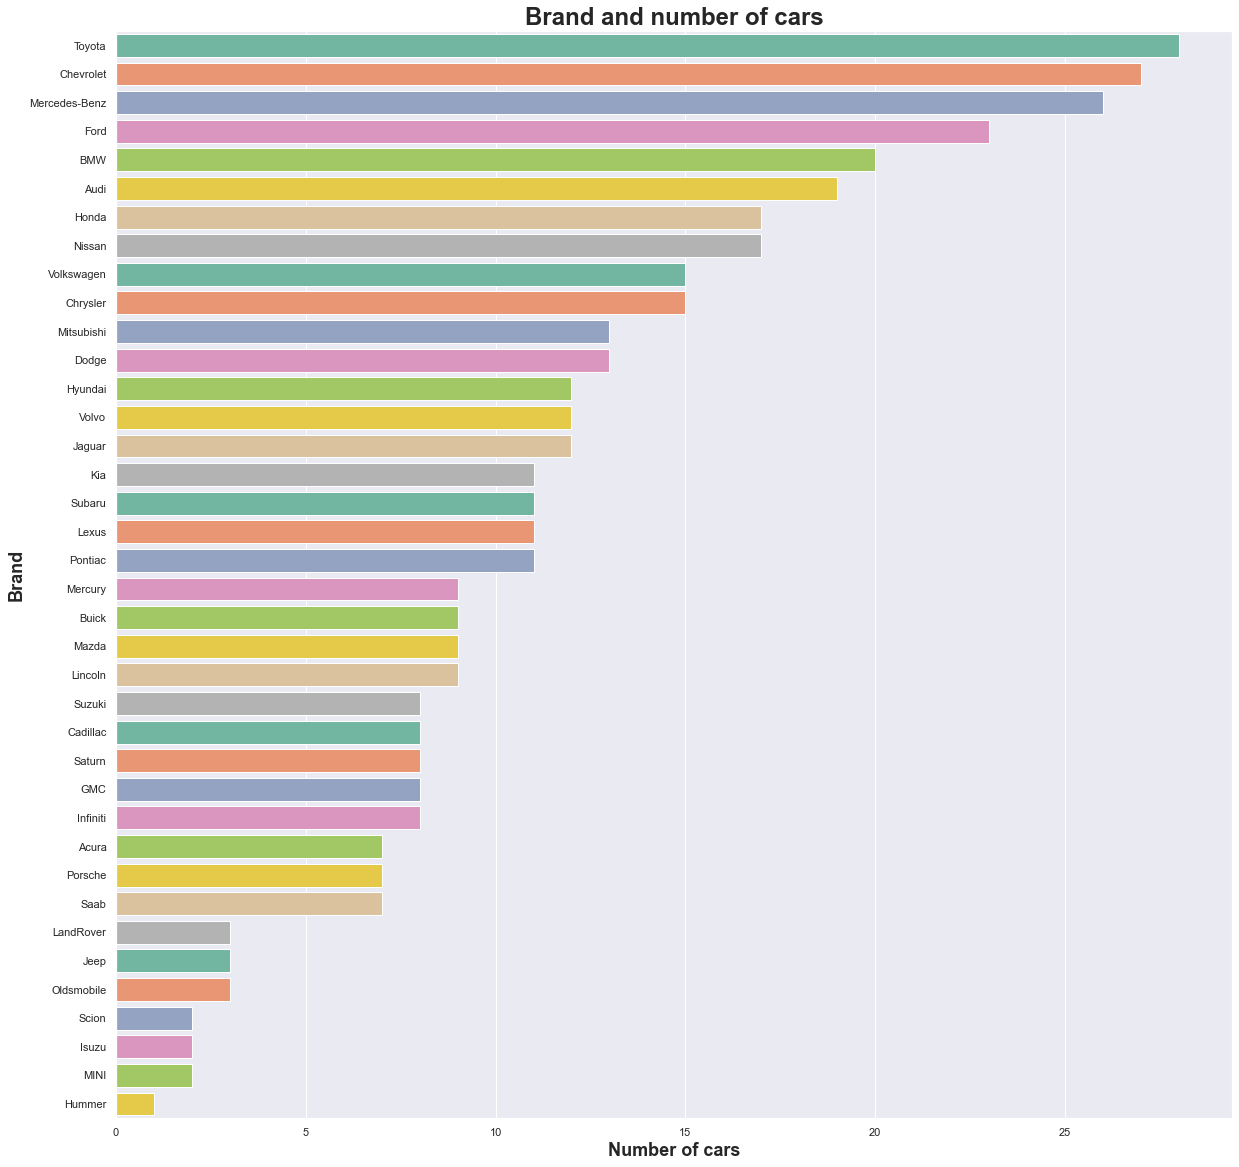

In [15]:
plt.figure(figsize=(20,20))
sns.barplot(x = brand,
            y = brand.index,
            palette = 'Set2')
plt.title('Brand and number of cars', fontsize = 24, weight = 'bold')
plt.xlabel('Number of cars', fontsize = 18, weight = 'bold')
plt.ylabel('Brand', fontsize = 18, weight = 'bold')
plt.show();

>In the dataset, Toyota has 28 cars, while Hummer has only one.

# Q2: Where is the origin with highest number of cars?

In [16]:
df.head(1)

,make,model,type,origin,drivetrain,msrp_$,invoice_$,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189


In [17]:
origin_cars = df['origin'].value_counts()
origin_cars

Asia      156
USA       147
Europe    123
Name: origin, dtype: int64

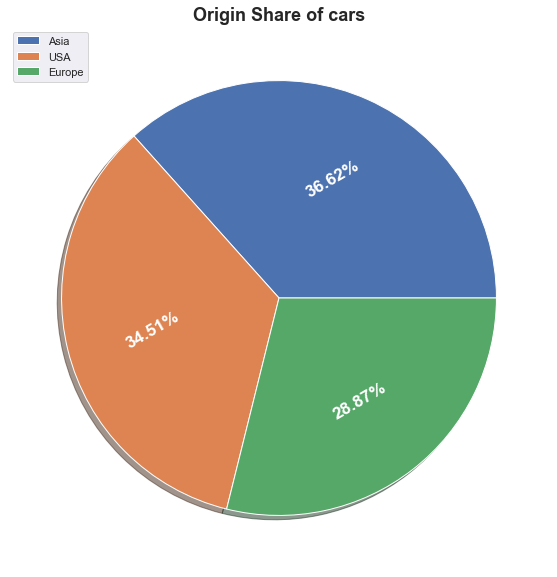

In [18]:
plt.figure(figsize=(14,10))
plt.pie(origin_cars, labels=origin_cars.index, autopct= '%.2f%%', shadow =True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Origin Share of cars', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

>In the dataset, Asia contribute with the highest share of cars with 36.62%.

# Q3: What is the brand with most expensive cars?

In [19]:
brand_price = df.groupby('make')['msrp_$'].mean().sort_values(ascending = False)
brand_price

make
Porsche          83565.000000
Jaguar           61580.416667
Mercedes-Benz    60656.807692
Cadillac         50474.375000
Hummer           49995.000000
LandRover        45831.666667
Lexus            44215.454545
Audi             43307.894737
BMW              43285.250000
Acura            42938.571429
Lincoln          42875.555556
Saab             37640.000000
Volvo            36314.166667
Infiniti         36070.000000
Volkswagen       32248.666667
Buick            30537.777778
GMC              29560.500000
Mercury          27972.777778
Chrysler         27252.000000
Chevrolet        26587.037037
Dodge            26253.846154
Isuzu            26149.000000
Subaru           25501.818182
Nissan           24730.941176
Jeep             24518.333333
Pontiac          24156.363636
Ford             24015.869565
Oldsmobile       23763.333333
Mitsubishi       23423.615385
Toyota           22524.464286
Honda            21434.705882
Mazda            20730.888889
MINI             18499.000000
Hyund

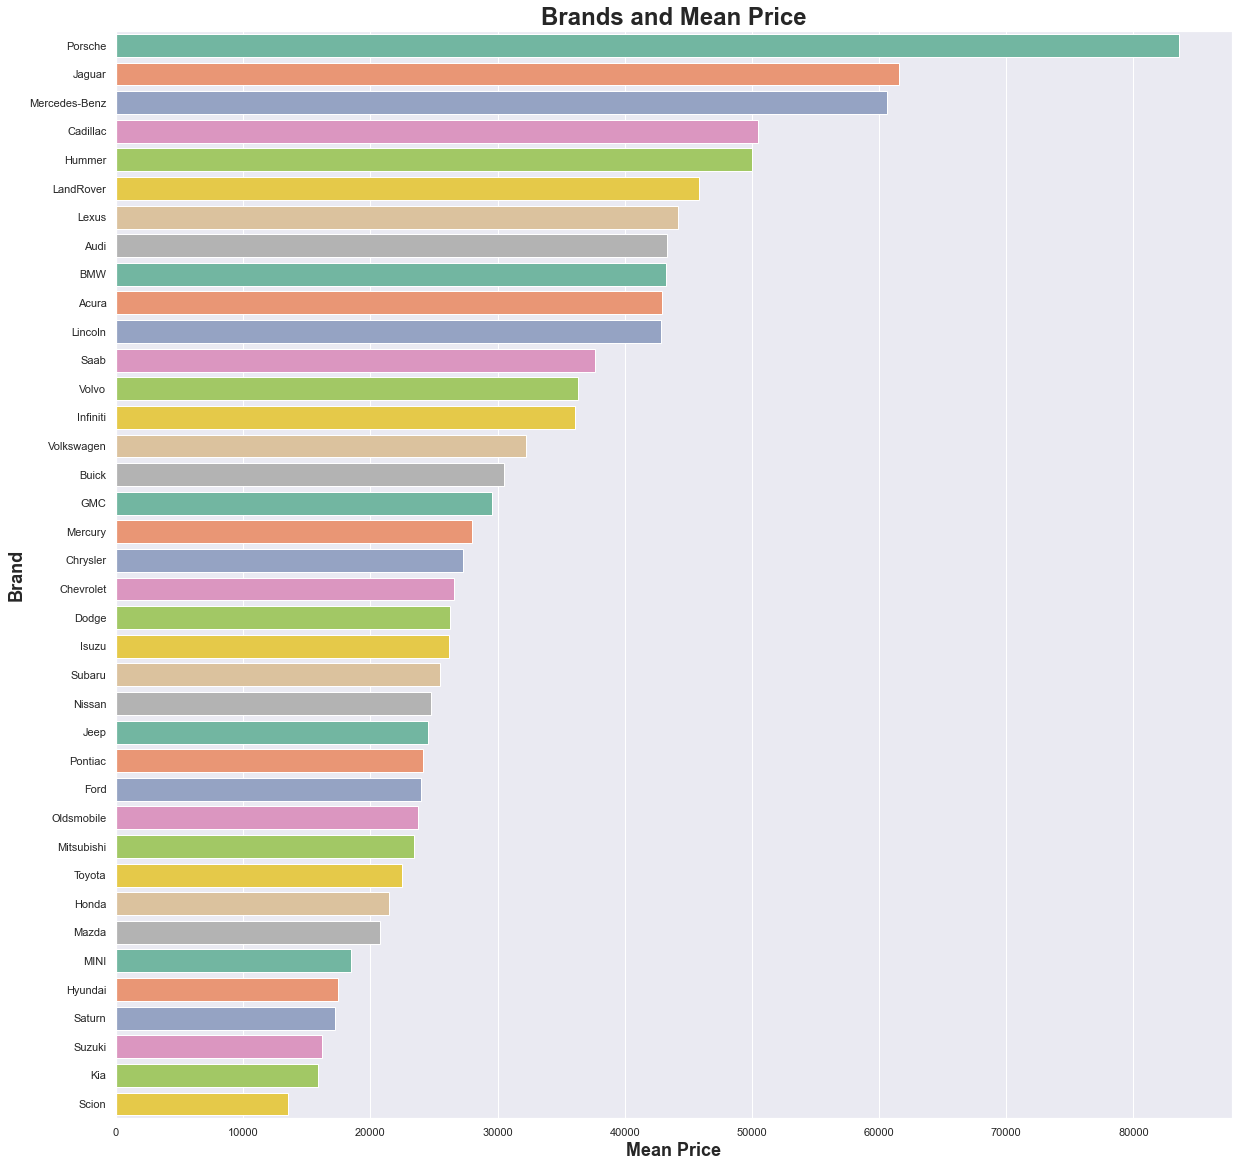

In [20]:
plt.figure(figsize=(20,20))
sns.barplot(x = brand_price,
            y = brand_price.index,
            palette = 'Set2')
plt.title('Brands and Mean Price', fontsize = 24, weight = 'bold')
plt.xlabel('Mean Price', fontsize = 18, weight = 'bold')
plt.ylabel('Brand', fontsize = 18, weight = 'bold')
plt.show();

>The mean price of a Porsche is 83565 dollars, while Scion is only 13565.

# Q4: Which region shares the highest mean Price?

In [21]:
origin_price = df.groupby('origin')['msrp_$'].mean().sort_values(ascending = False)

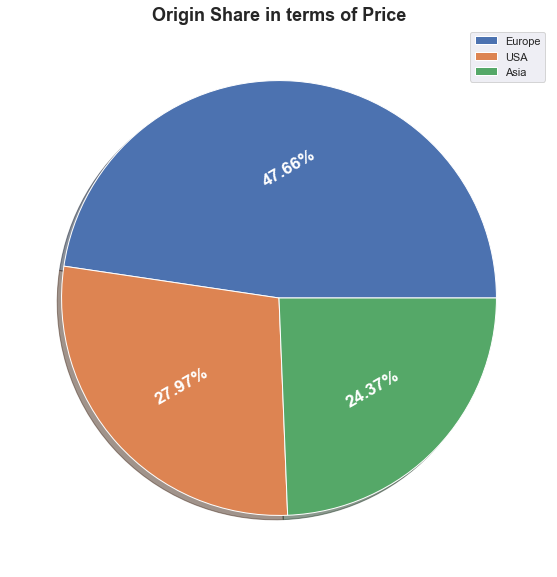

In [22]:
plt.figure(figsize=(14,10))
plt.pie(origin_price, labels=origin_price.index, autopct= '%.2f%%', shadow =True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Origin Share in terms of Price', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

>Europe shares almost 50% of the market in terms of Price.

# Q5: Is there a correlation between engine size and price?

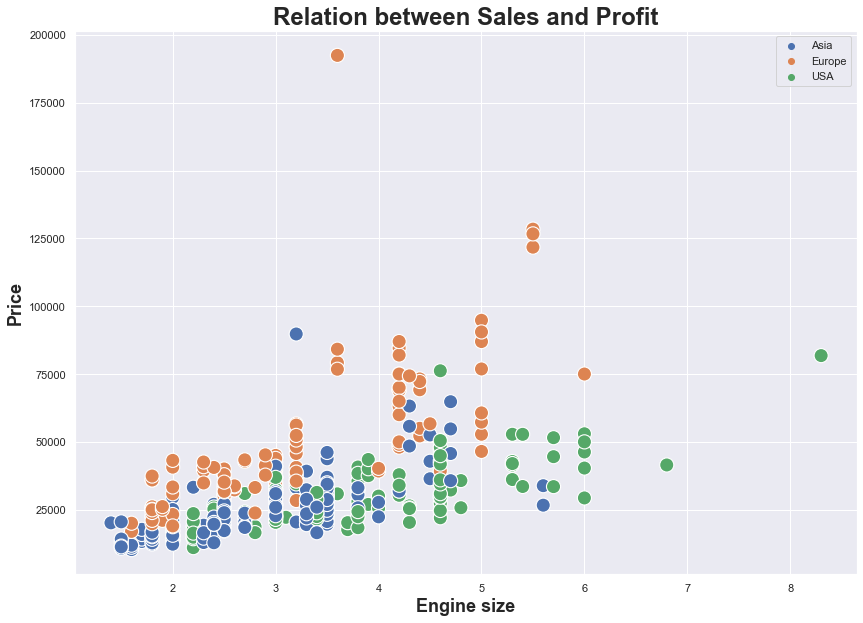

In [23]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'enginesize',
                y = 'msrp_$',
                data = df,
                hue='origin',
                s = 200)
plt.title('Relation between Sales and Profit', fontsize = 24, weight = 'bold')
plt.xlabel('Engine size', fontsize = 18, weight = 'bold')
plt.ylabel('Price', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>There is a positive correlation between Engine size and Price, European cars tend to have a higher price with same engine size compared to both Usa and Asia.

>USA cars have higher engine size compared to Europe and Asia.

# Q6: Is there a correlation between horse power and price?

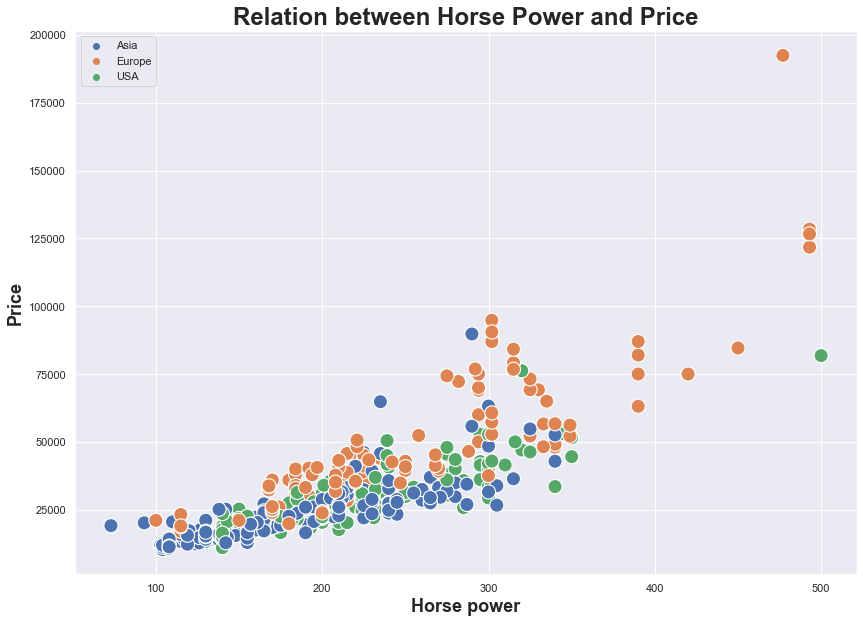

In [24]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'horsepower',
                y = 'msrp_$',
                data = df,
                hue='origin',
                s = 200)
plt.title('Relation between Horse Power and Price', fontsize = 24, weight = 'bold')
plt.xlabel('Horse power', fontsize = 18, weight = 'bold')
plt.ylabel('Price', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>There is a stron positive correlation between Horse power and Price, European cars tend to have a higher price with same horse power compared to both Usa and Asia.

>European cars have higher horse power compared to USA and Asia.

# Q7: What is the most expensive car type?

In [25]:
type_top = df.groupby('type')['msrp_$'].mean().sort_values(ascending = False).head(20)
type_top

type
Sports    54533.319149
SUV       34790.250000
Sedan     29773.618321
Wagon     28840.533333
Truck     24941.375000
Hybrid    19920.000000
Name: msrp_$, dtype: float64

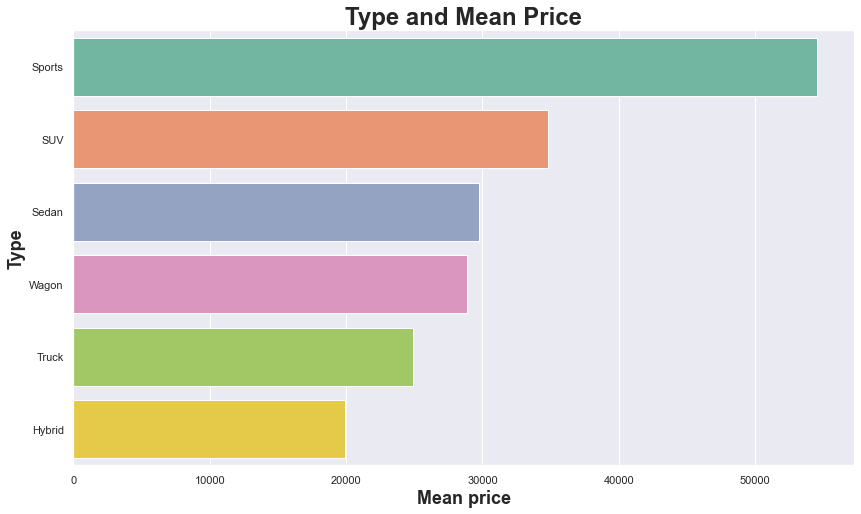

In [26]:
plt.figure(figsize=(14,8))
sns.barplot(x = type_top,
            y = type_top.index,
            palette = 'Set2')
plt.title('Type and Mean Price', fontsize = 24, weight = 'bold')
plt.xlabel('Mean price', fontsize = 18, weight = 'bold')
plt.ylabel('Type', fontsize = 18, weight = 'bold')
plt.show();

>Sports Cars have a mean price of 54533 dollars compared to Hybrid cars with only 19920 dollars.

# Q8: What is the most fuel efficient brand for travelling?

In [27]:
brand_fuel = df.groupby('make')['mpg_highway'].mean().sort_values(ascending = False)
brand_fuel

make
Scion            36.500000
MINI             35.500000
Honda            34.000000
Saturn           32.875000
Toyota           30.678571
Hyundai          29.916667
Oldsmobile       29.000000
Saab             28.857143
Kia              28.818182
Volkswagen       28.533333
Pontiac          27.909091
Mazda            27.888889
Suzuki           27.875000
Buick            27.777778
Chrysler         27.333333
Mitsubishi       27.230769
Subaru           27.090909
BMW              27.000000
Chevrolet        26.851852
Volvo            26.666667
Dodge            26.230769
Acura            26.142857
Audi             25.789474
Ford             25.739130
Jaguar           25.583333
Nissan           25.411765
Porsche          24.714286
Mercury          24.555556
Infiniti         23.875000
Mercedes-Benz    23.653846
Lexus            23.454545
Lincoln          23.444444
Cadillac         23.000000
Jeep             21.333333
Isuzu            20.500000
GMC              19.625000
LandRover        17.666

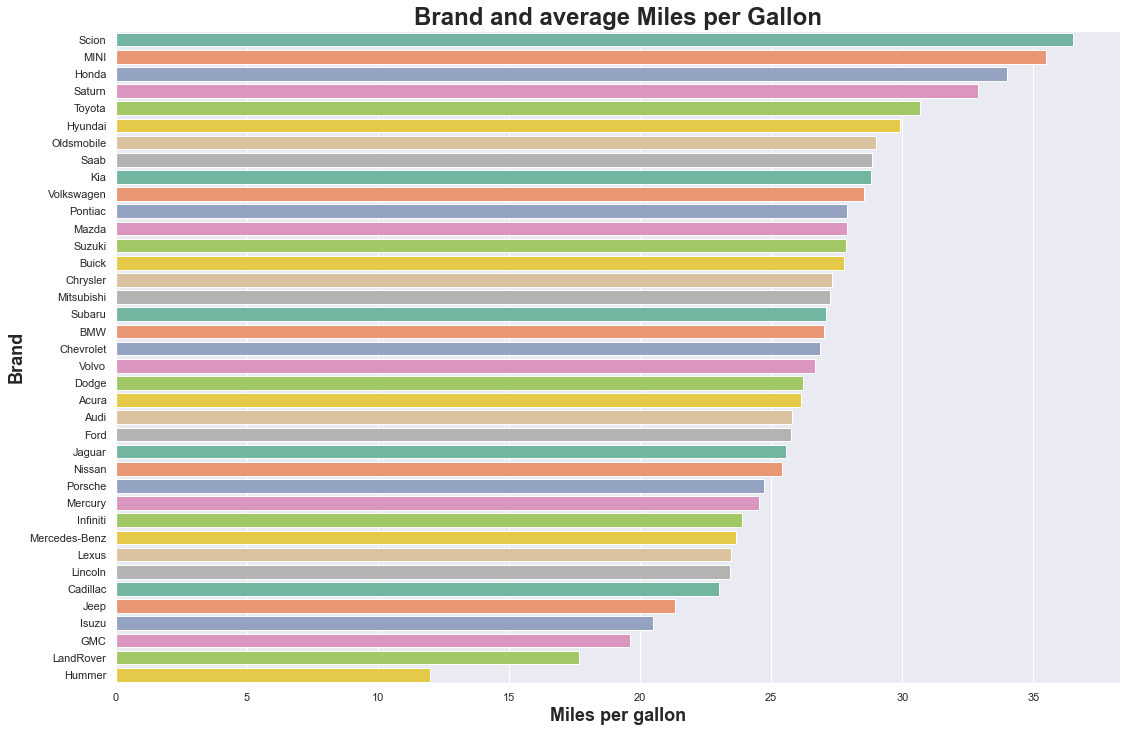

In [28]:
plt.figure(figsize=(18,12))
sns.barplot(x = brand_fuel,
            y = brand_fuel.index,
            palette = 'Set2')
plt.title('Brand and average Miles per Gallon', fontsize = 24, weight = 'bold')
plt.xlabel('Miles per gallon', fontsize = 18, weight = 'bold')
plt.ylabel('Brand', fontsize = 18, weight = 'bold')
plt.show();

>In terms of travelling Scion can manage 36.5 miles per gallon compared to Hammers only 12 miles.

# Q9: What is the most fuel efficient brand for the city?

In [29]:
brand_fuel_city = df.groupby('make')['mpg_city'].mean().sort_values(ascending = False)
brand_fuel_city

make
Scion            31.500000
Honda            27.823529
MINI             26.500000
Toyota           24.428571
Saturn           24.375000
Hyundai          23.000000
Mazda            22.222222
Suzuki           22.125000
Kia              21.909091
Volkswagen       21.400000
Oldsmobile       21.000000
Mitsubishi       20.923077
Pontiac          20.545455
Saab             20.428571
Subaru           20.272727
Chrysler         19.866667
Volvo            19.750000
Nissan           19.705882
Chevrolet        19.666667
Acura            19.428571
Dodge            19.384615
Ford             19.260870
Buick            18.888889
BMW              18.700000
Audi             18.473684
Mercury          17.555556
Jaguar           17.500000
Lexus            17.454545
Porsche          17.428571
Mercedes-Benz    17.346154
Jeep             17.333333
Infiniti         17.250000
Lincoln          16.777778
Cadillac         16.500000
Isuzu            16.000000
GMC              15.375000
LandRover        14.000

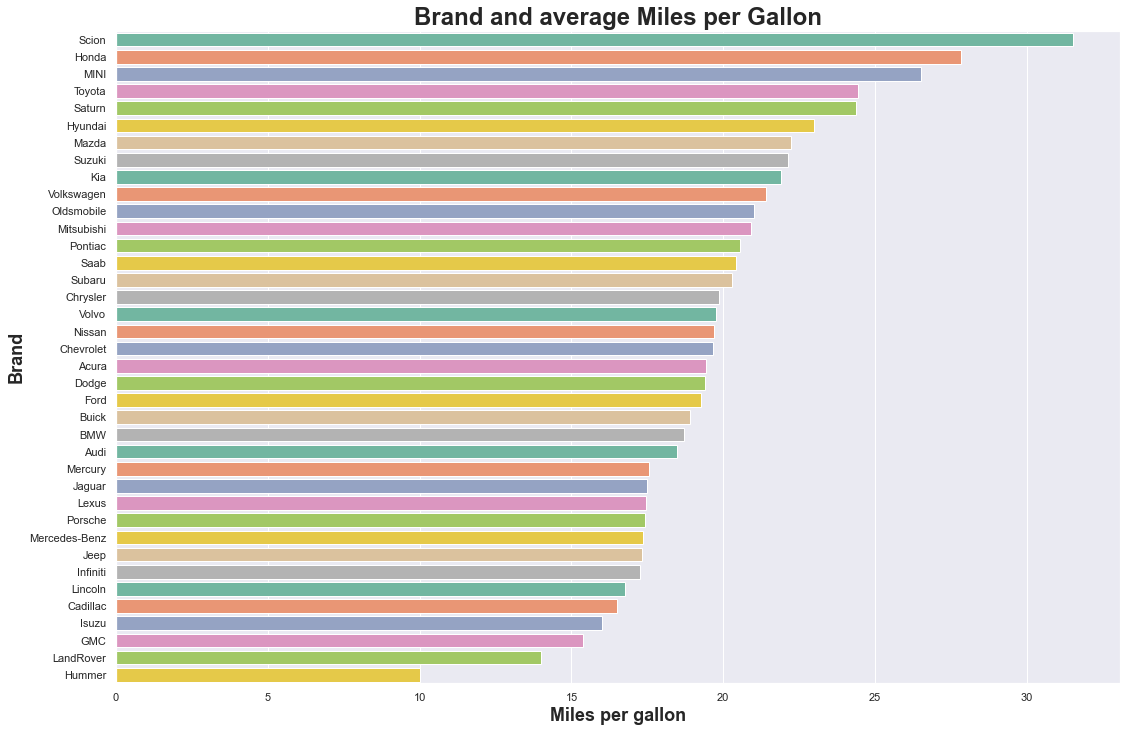

In [30]:
plt.figure(figsize=(18,12))
sns.barplot(x = brand_fuel_city,
            y = brand_fuel_city.index,
            palette = 'Set2')
plt.title('Brand and average Miles per Gallon', fontsize = 24, weight = 'bold')
plt.xlabel('Miles per gallon', fontsize = 18, weight = 'bold')
plt.ylabel('Brand', fontsize = 18, weight = 'bold')
plt.show();

>In the city Scion can manage 31.5 miles per gallon compared to Hammers only 10 miles.

# Q10: Are cars more fuel efficient on high way or  in the city?

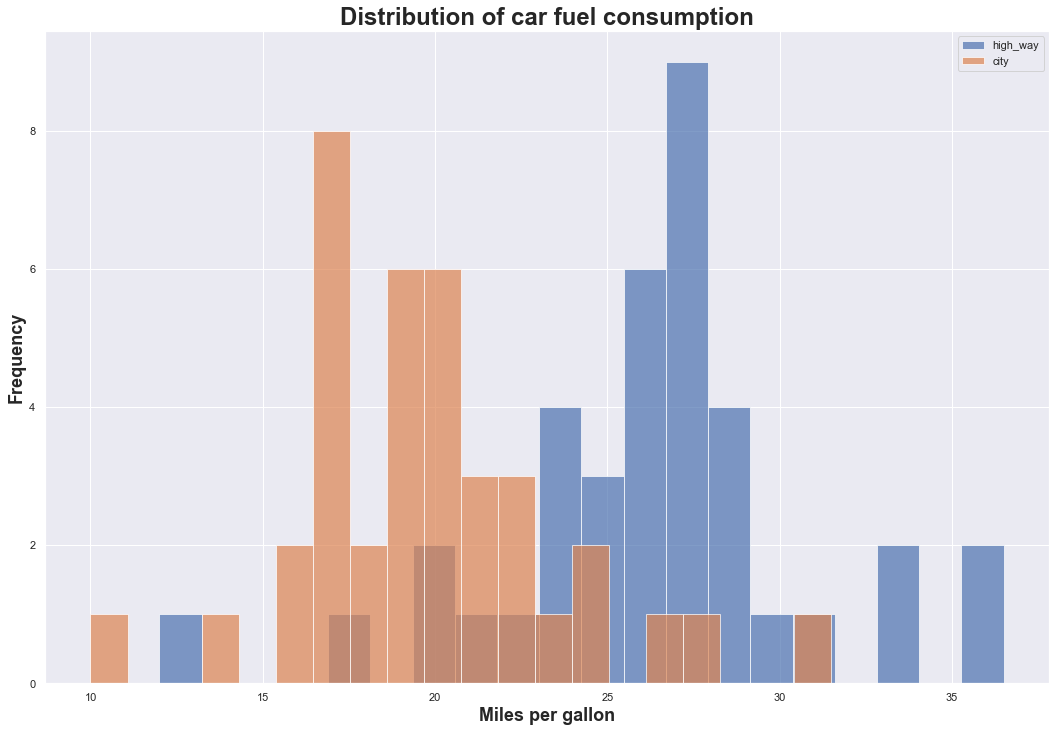

In [31]:
plt.figure(figsize=(18,12))
brand_fuel.hist(alpha = 0.7, bins =20, label = 'high_way')
brand_fuel_city.hist(alpha = 0.7, bins =20, label = 'city')
plt.title('Distribution of car fuel consumption', fontsize = 24, weight = 'bold')
plt.xlabel('Miles per gallon', fontsize = 18, weight = 'bold')
plt.ylabel('Frequency', fontsize = 18, weight = 'bold')
plt.legend()
plt.show();

>From the Graph, Cars seem to be more fuel efficient on high roads compared to the city.

<a id='conclusions'></a>
# Conclusions:

>In the dataset, Toyota has 28 cars, while Hummer has only one.

>In the dataset, Asia contribute with the highest share of cars with 36.62%.

>The mean price of a Porsche is 83565 dollars, while Scion is only 13565.

>Europe shares almost 50% of the market in terms of Price.

>There is a positive correlation between Engine size and Price, European cars tend to have a higher price with same engine size compared to both Usa and Asia.

>USA cars have higher engine size compared to Europe and Asia.

>There is a stron positive correlation between Horse power and Price, European cars tend to have a higher price with same horse power compared to both Usa and Asia.

>European cars have higher horse power compared to USA and Asia.

>Sports Cars have a mean price of 54533 dollars compared to Hybrid cars with only 19920 dollars.

>In terms of travelling Scion can manage 36.5 miles per gallon compared to Hammers only 12 miles.

>In the city Scion can manage 31.5 miles per gallon compared to Hammers only 10 miles.

>From the Graph, Cars seem to be more fuel efficient on high roads compared to the city.